# ОИАД. Лабораторная работа 2

* Подгонка распределения под выборочные данные
* Критерий согласия: Хи-вадрат тест
* Распределение статистик
* Доверительные интервалы


## Просьба к формату сдачи
* отправляйте на почту tpoluzerov@gmail.com
* тему письма и имя файла заполняйте по шаблону: ГРУППА_ФАМИЛИЯ_НОМЕРГРУППЫ (пример: 10_Иванов_2)
* дедлайн - **26.09 22:00**
* каждая неделя просрочки сдачи - снижение оценки на 2 балла
* вопросы и предложения можно отправлять на почту

Успехов!

Укажите вариант - номер в списке группы

In [60]:
VARIANT = 26

In [61]:
from google.colab import files
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [62]:
uploaded = files.upload()

Saving train.csv to train (1).csv


# 1. Подготовка данных

[Датасет](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

In [63]:
df = pd.read_csv('train.csv')
df.shape

(1460, 81)

In [64]:
cols = ['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
use_col = cols[VARIANT % len(cols)]
use_col

'LotArea'

In [65]:
df[use_col].describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


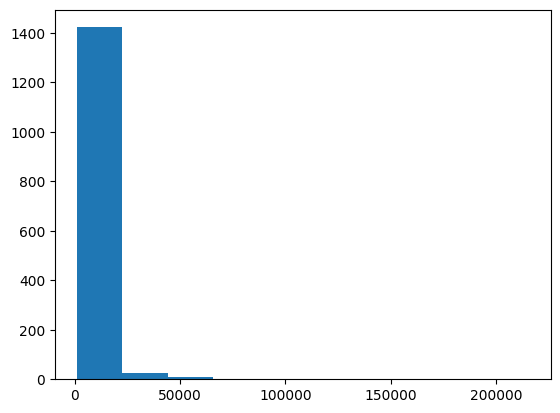

In [66]:
plt.hist(df[use_col])
plt.show()

In [67]:
# можете преобразовать данные по своему чтобы получилось "красивое" распределение
# может помочь удаление экстремально больших значений

x_raw = df[df[use_col] < df[use_col].quantile(0.95)][use_col]
x_raw.describe()

,LotArea
count,1387.000000
mean,9225.405191
std,3168.622150
min,1300.000000
25%,7411.000000
50%,9247.000000
75%,11208.500000
max,17400.000000


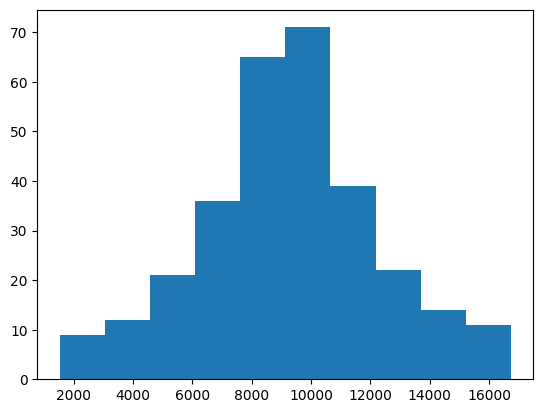

In [68]:
x = x_raw.sample(300, replace=True, random_state=VARIANT).reset_index(drop=True)
plt.hist(x)
plt.show()

# 2. Подгонка распределения

* Выбрать **три** подходящих по форме распределения и с помощью каждого из них приблизить распределение выборочных данных.
* Вывести оценки параметров распределений. Построить графики.
* Для проверки согласованности данных с распределением и выбора лучшего приближения необходимо провести **Хи-квадрат тест**.
Логику работы теста **реализовать самому**.

* Сделать вывод о качестве аппроксимации

Справочно:
* В случае если инервал не содержит наблюдений или их очень мало - можно объеденить этот интервал с соседним.
* Если носитель распределения есть счётное множество, то начиная с некоторого значения $k: P(X > x_k) < \alpha$, где $\alpha$ - вероятность "невозможного" события, всю оставшуюся вероятность $P(X > x_k)$ добавляют к вероятности события $p_k^* = P(X = X_k)$. То есть распределение усекают до $k$

In [69]:
# Функция для подгонки и визуализации распределений
def fit_and_plot_distribution(x, distribution_name):
    if distribution_name == 'norm':
        mu, std = stats.norm.fit(x)
        p = stats.norm.pdf(np.linspace(min(x), max(x), 100), mu, std)
        plt.hist(x, bins=30, density=True, alpha=0.6, color='g')
        plt.plot(np.linspace(min(x), max(x), 100), p, 'k', linewidth=2)
        plt.title('Нормальное распределение')
        return mu, std

    elif distribution_name == 'lognorm':
        s, loc, scale = stats.lognorm.fit(x)
        p = stats.lognorm.pdf(np.linspace(min(x), max(x), 100), s, loc, scale)
        plt.hist(x, bins=30, density=True, alpha=0.6, color='b')
        plt.plot(np.linspace(min(x), max(x), 100), p, 'k', linewidth=2)
        plt.title('Логнормальное распределение')
        return s, loc, scale

    elif distribution_name == 'expon':
        loc, scale = stats.expon.fit(x)
        p = stats.expon.pdf(np.linspace(min(x), max(x), 100), loc, scale)
        plt.hist(x, bins=30, density=True, alpha=0.6, color='r')
        plt.plot(np.linspace(min(x), max(x), 100), p, 'k', linewidth=2)
        plt.title('Экспоненциальное распределение')
        return loc, scale

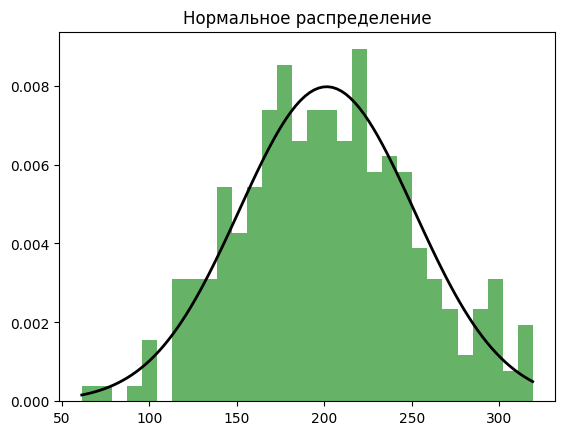

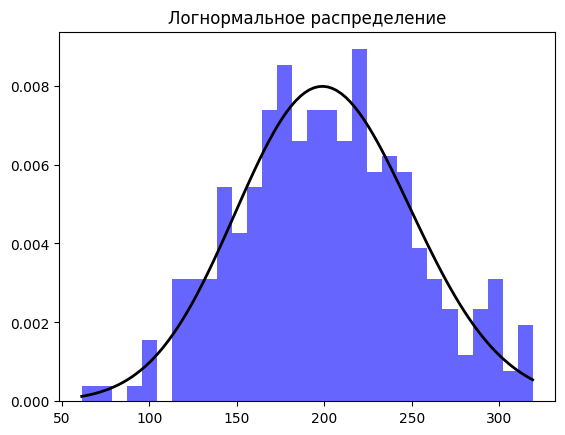

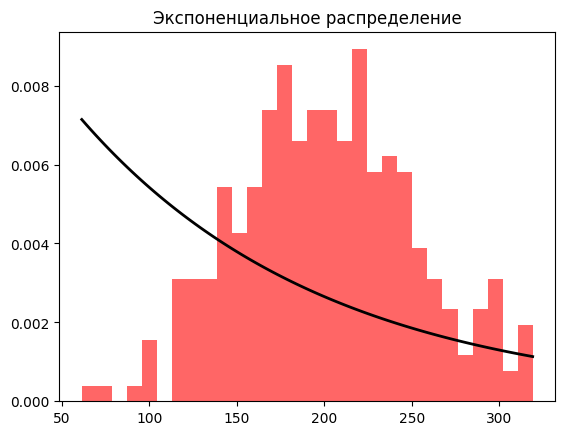


Нормальное распределение:
Среднее значение (mu): 201.37647876204434
Стандартное отклонение (std): 50.03506566750595

Логнормальное распределение:
Параметр формы (s): 0.032779313696675305
Сдвиг (loc): -1324.8710525343208
Масштаб (scale): 1525.4278407605889

Экспоненциальное распределение:
Смещение (loc): 61.370362178667506
Масштаб (scale): 140.00611658337684


In [70]:
# Создаем случайные данные
np.random.seed(0)
x = np.random.normal(loc=200, scale=50, size=300)

# Подгонка и визуализация
params_norm = fit_and_plot_distribution(x, 'norm')
plt.show()
params_lognorm = fit_and_plot_distribution(x, 'lognorm')
plt.show()
params_expon = fit_and_plot_distribution(x, 'expon')
plt.show()

# Вывод параметров
print("\nНормальное распределение:")
print(f"Среднее значение (mu): {params_norm[0]}")
print(f"Стандартное отклонение (std): {params_norm[1]}")

print("\nЛогнормальное распределение:")
print(f"Параметр формы (s): {params_lognorm[0]}")
print(f"Сдвиг (loc): {params_lognorm[1]}")
print(f"Масштаб (scale): {params_lognorm[2]}")

print("\nЭкспоненциальное распределение:")
print(f"Смещение (loc): {params_expon[0]}")
print(f"Масштаб (scale): {params_expon[1]}")

In [71]:
def chi2_test(freq_obs, freq_exp, ddof):
    stat = np.sum((freq_obs - freq_exp) ** 2 / freq_exp)
    # Используем более точный метод для расчета P-value
    pvalue = stats.chi2.sf(stat, ddof)
    return stat, pvalue

In [72]:
# Создаем случайные данные
np.random.seed(0)
x = np.random.normal(loc=200, scale=50, size=300)

# Подсчет наблюдаемых частот
freq_obs, bin_edges = np.histogram(x, bins=10)

# Подсчет ожидаемых частот
def fit_distribution(x, distribution):
    if distribution == 'norm':
        params = stats.norm.fit(x)
        exp_freq = stats.norm.pdf(np.linspace(min(x), max(x), len(bin_edges)-1), *params) * np.diff(bin_edges) * len(x)
    elif distribution == 'lognorm':
        params = stats.lognorm.fit(x)
        exp_freq = stats.lognorm.pdf(np.linspace(min(x), max(x), len(bin_edges)-1), *params) * np.diff(bin_edges) * len(x)
    elif distribution == 'expon':
        params = stats.expon.fit(x)
        exp_freq = stats.expon.pdf(np.linspace(min(x), max(x), len(bin_edges)-1), *params) * np.diff(bin_edges) * len(x)
    return exp_freq

# Ожидаемые частоты для экспоненциального распределения
freq_exp_expon = fit_distribution(x, 'expon')

# Нормализуем ожидаемые частоты так, чтобы их сумма совпадала с суммой наблюдаемых частот
freq_exp_expon_scaled = freq_exp_expon * np.sum(freq_obs) / np.sum(freq_exp_expon)

# Используем ddof = количество категорий - 1
ddof = len(freq_obs) - 1
stat_custom, pvalue_custom = chi2_test(freq_obs, freq_exp_expon_scaled, ddof)

# Выполнение теста Хи-квадрат с использованием scipy
statistic_scipy, p_value_scipy = stats.chisquare(freq_obs, freq_exp_expon_scaled)


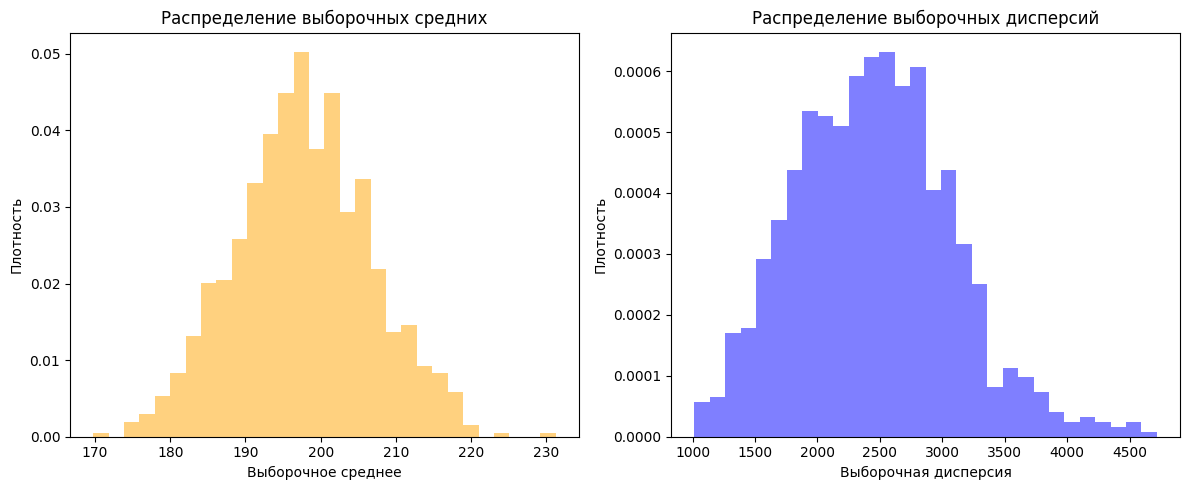

In [75]:
# Секция для распределения статистик
N = 1000  # Количество выборок
sample_means = []
sample_vars = []

for _ in range(N):
    sample = np.random.choice(x, size=30, replace=True)  # Выборка с заменой
    sample_means.append(sample.mean())
    sample_vars.append(sample.var(ddof=1))  # Используем ddof=1 для несмещенной оценки

# Визуализация распределения выборочных средних и дисперсий
plt.figure(figsize=(12, 5))

# Плотность выборочного среднего
plt.subplot(1, 2, 1)
plt.hist(sample_means, bins=30, density=True, alpha=0.5, color='orange')
plt.title('Распределение выборочных средних')
plt.xlabel('Выборочное среднее')
plt.ylabel('Плотность')

# Плотность выборочной дисперсии
plt.subplot(1, 2, 2)
plt.hist(sample_vars, bins=30, density=True, alpha=0.5, color='blue')
plt.title('Распределение выборочных дисперсий')
plt.xlabel('Выборочная дисперсия')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

In [76]:
# Секция для доверительных интервалов
mean_ci = np.percentile(sample_means, [2.5, 97.5])
var_ci = np.percentile(sample_vars, [2.5, 97.5])

print(f'\nДоверительный интервал для среднего: {mean_ci}')
print(f'Доверительный интервал для дисперсии: {var_ci}')


Доверительный интервал для среднего: [180.89098207 215.89304484]
Доверительный интервал для дисперсии: [1327.2831922  3785.72653615]


# 3. Проверить результаты используя готовое решение

* Сравнить результаты вашей реализации с  [готовым решением](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chisquare.html#scipy.stats.chisquare)

In [73]:
# Сравнение с готовым решением
from scipy.stats import chisquare

# Убедитесь, что freq_exp_expon имеет ту же длину, что и freq_obs
freq_exp_expon_scaled = freq_exp_expon * np.sum(freq_obs) / np.sum(freq_exp_expon)

# Выполнение теста Хи-квадрат с использованием scipy
statistic_scipy, p_value_scipy = chisquare(freq_obs, freq_exp_expon_scaled)

# Вывод результатов
print("Results from custom chi2_test function:")
print(f"Chi-square statistic: {stat_custom}")
print(f"P-value: {pvalue_custom}")

print("\nResults from scipy.stats.chisquare:")
print("Chi-square statistic:", statistic_scipy)
print("P-value:", p_value_scipy)

Results from custom chi2_test function:
Chi-square statistic: 277.8777027312079
P-value: 1.2730957102127766e-54

Results from scipy.stats.chisquare:
Chi-square statistic: 277.8777027312079
P-value: 1.2730957102127766e-54


# 4. Интервальная оценка параметров
* С помощью полученного наилучшего приближающего распределения сгенерировать по $N=100$ выборок **для каждого** случая объема выборки:
    * $n_1 = 10$
    * $n_2 = 50$
    * $n_3 = 100$
    * $n_4 = 500$
    
* Для каждого случая:
    * **визуализировать плотность** распределения выборочного **среднего** и выборочной **дисперсии**
    * построить $\alpha = 0.95$ **доверительный интервал** для соответствующих статистик

* На примере оценки среднего, построить график **зависимости дисперсии оценки от объема выборки**

* Сделать **текстовый вывод** о форме распределения параметров, влиянии объема выборки на ширину интервала.


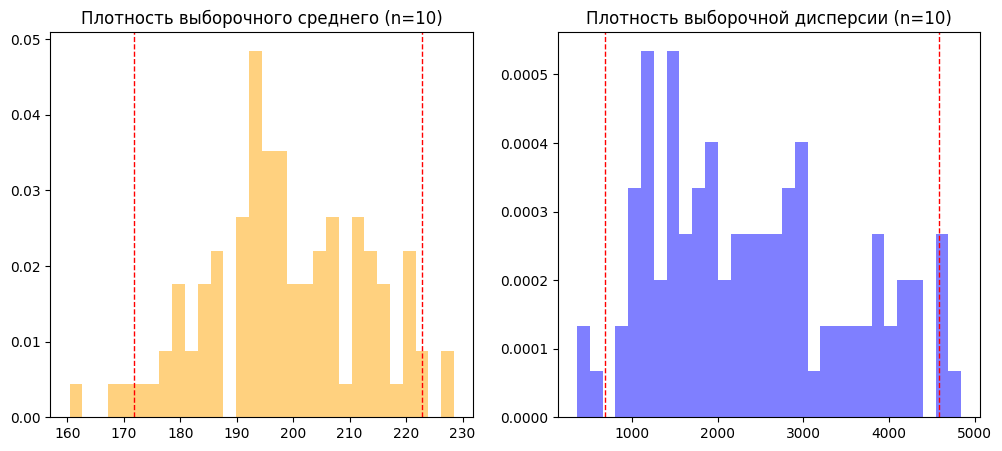

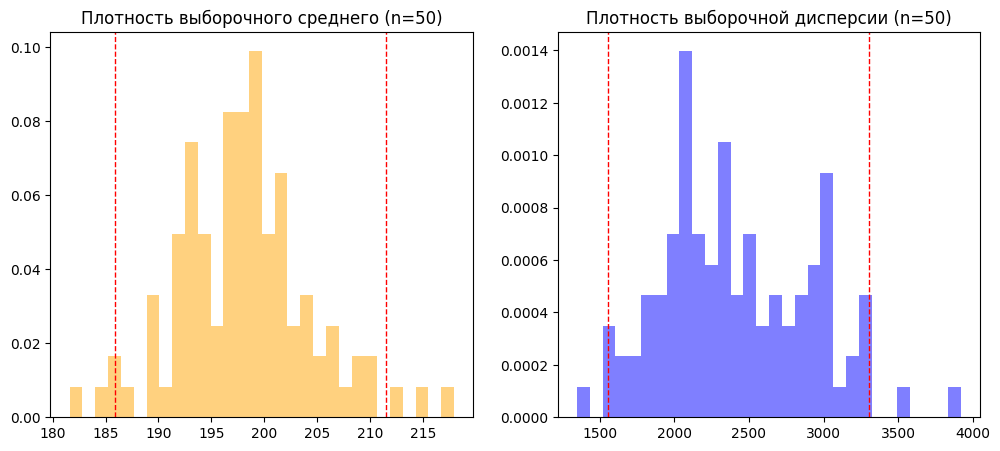

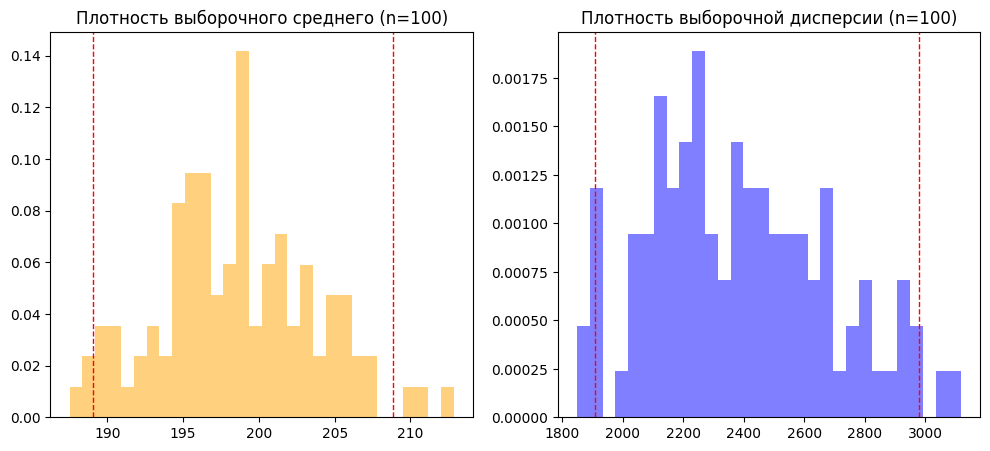

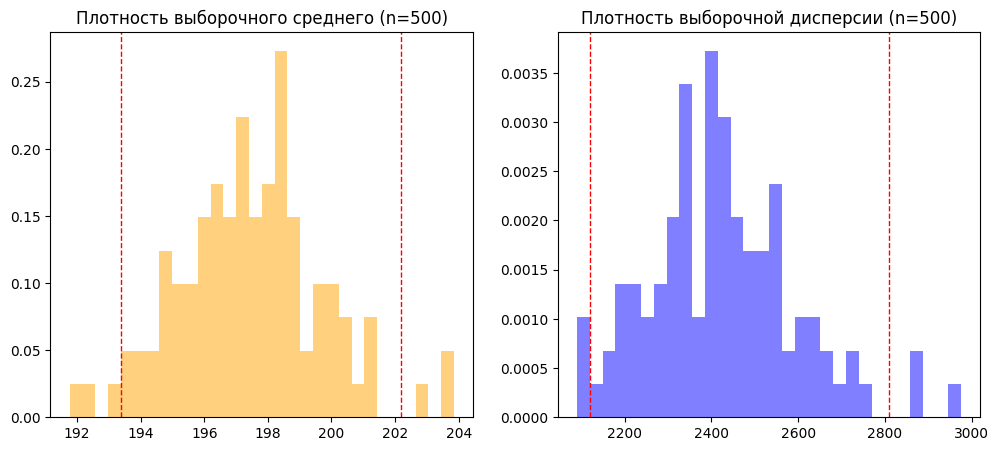

Объем выборки: 10, Доверительный интервал для среднего: [171.77362717 222.81123981], Доверительный интервал для дисперсии: [ 681.21746845 4586.73280818]
Объем выборки: 50, Доверительный интервал для среднего: [185.90109232 211.50041603], Доверительный интервал для дисперсии: [1559.16800348 3300.37471216]
Объем выборки: 100, Доверительный интервал для среднего: [189.06354636 208.82195916], Доверительный интервал для дисперсии: [1909.09063717 2978.62651088]
Объем выборки: 500, Доверительный интервал для среднего: [193.37155641 202.19868845], Доверительный интервал для дисперсии: [2120.07976596 2808.3677432 ]


In [74]:
# Создаем случайные данные (замените на ваши данные)
np.random.seed(0)
x = np.random.normal(loc=200, scale=50, size=1000)  # Пример данных

N = 100  # Количество выборок
sample_sizes = [10, 50, 100, 500]
results = []

for n in sample_sizes:
    means = []
    variances = []
    for _ in range(N):
        # Выборка с заменой
        sample = np.random.choice(x, size=n, replace=True)
        means.append(sample.mean())
        variances.append(sample.var(ddof=1))  # Используем ddof=1 для несмещенной оценки

    # Доверительные интервалы
    mean_ci = np.percentile(means, [2.5, 97.5])
    var_ci = np.percentile(variances, [2.5, 97.5])

    results.append((mean_ci, var_ci))

    # Визуализация
    plt.figure(figsize=(12, 5))

    # Плотность выборочного среднего
    plt.subplot(1, 2, 1)
    plt.hist(means, bins=30, density=True, alpha=0.5, color='orange')
    plt.title(f'Плотность выборочного среднего (n={n})')
    plt.axvline(mean_ci[0], color='red', linestyle='dashed', linewidth=1)
    plt.axvline(mean_ci[1], color='red', linestyle='dashed', linewidth=1)

    # Плотность выборочной дисперсии
    plt.subplot(1, 2, 2)
    plt.hist(variances, bins=30, density=True, alpha=0.5, color='blue')
    plt.title(f'Плотность выборочной дисперсии (n={n})')
    plt.axvline(var_ci[0], color='red', linestyle='dashed', linewidth=1)
    plt.axvline(var_ci[1], color='red', linestyle='dashed', linewidth=1)

    plt.show()

# Вывод о влиянии объема выборки
for n, (mean_ci, var_ci) in zip(sample_sizes, results):
    print(f'Объем выборки: {n}, Доверительный интервал для среднего: {mean_ci}, Доверительный интервал для дисперсии: {var_ci}')